<a href="https://colab.research.google.com/github/umleeho1/DataAnalysis/blob/main/covidproblem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

pd.show_versions()


INSTALLED VERSIONS
------------------
commit           : 2e218d10984e9919f0296931d92ea851c6a6faf5
python           : 3.10.11.final.0
python-bits      : 64
OS               : Linux
OS-release       : 5.10.147+
Version          : #1 SMP Sat Dec 10 16:00:40 UTC 2022
machine          : x86_64
processor        : x86_64
byteorder        : little
LC_ALL           : None
LANG             : en_US.UTF-8
LOCALE           : en_US.UTF-8

pandas           : 1.5.3
numpy            : 1.22.4
pytz             : 2022.7.1
dateutil         : 2.8.2
setuptools       : 67.7.2
pip              : 23.0.1
Cython           : 0.29.34
pytest           : 7.2.2
hypothesis       : None
sphinx           : 3.5.4
blosc            : None
feather          : None
xlsxwriter       : None
lxml.etree       : 4.9.2
html5lib         : 1.1
pymysql          : None
psycopg2         : 2.9.6
jinja2           : 3.1.2
IPython          : 7.34.0
pandas_datareader: 0.10.0
bs4              : 4.11.2
bottleneck       : None
brotli           

In [ ]:
#Google Drive에 연결 : 왼쪽 폴더 이미지 클릭 

!pwd

/content


In [ ]:
# CSV파일 읽어 오기
# 읽어 오려는 파일 오른쪽 클릭해서 '경로복사'

raw_df = pd.read_csv('/content/owid-covid-data.csv')

raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 228637 entries, 0 to 228636
Data columns (total 67 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   iso_code                                    228637 non-null  object 
 1   continent                                   217028 non-null  object 
 2   location                                    228637 non-null  object 
 3   date                                        228637 non-null  object 
 4   total_cases                                 216428 non-null  float64
 5   new_cases                                   216171 non-null  float64
 6   new_cases_smoothed                          215041 non-null  float64
 7   total_deaths                                198637 non-null  float64
 8   new_deaths                                  198564 non-null  float64
 9   new_deaths_smoothed                         197438 non-null  float64
 

In [ ]:
raw_df.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-02-24,5.0,5.0,NaN,NaN,NaN,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-02-25,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-02-26,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-02-27,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-02-28,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN


In [ ]:
raw_df.tail()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
11979,OWID_ASI,NaN,Asia,2021-10-27,79182264.0,111940.0,106610.857,1169584.0,2002.0,1676.429,...,NaN,NaN,NaN,NaN,NaN,4.721383e+09,NaN,NaN,NaN,NaN
11980,OWID_ASI,NaN,Asia,2021-10-28,79290720.0,108456.0,106092.143,1171619.0,2035.0,1751.143,...,NaN,NaN,NaN,NaN,NaN,4.721383e+09,NaN,NaN,NaN,NaN
11981,OWID_ASI,NaN,Asia,2021-10-29,79398436.0,107716.0,104818.714,1173101.0,1482.0,1683.857,...,NaN,NaN,NaN,NaN,NaN,4.721383e+09,NaN,NaN,NaN,NaN
11982,OWID_ASI,NaN,Asia,2021-10-30,79494274.0,95838.0,103726.571,1174843.0,1742.0,1718.857,...,NaN,NaN,NaN,NaN,NaN,4.721383e+09,NaN,NaN,NaN,NaN
11983,OWID_ASI,NaN,Asia,2021-10-31,79609297.0,115023.0,105547.000,1176076.0,1233.0,1680.429,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
#원하는 열 list만들기 (df : data frame)
selected_columns = ['new_cases', 'location', 'date', 'stringency_index']

#원하는 열을 추출한 데이터프레임 생성
revised_df = raw_df[selected_columns]

#수정된 데이터프레임 확인
revised_df.head()

,new_cases,location,date,stringency_index
0,5.0,Afghanistan,2020-02-24,8.33
1,0.0,Afghanistan,2020-02-25,8.33
2,0.0,Afghanistan,2020-02-26,8.33
3,0.0,Afghanistan,2020-02-27,8.33
4,0.0,Afghanistan,2020-02-28,8.33


In [ ]:
# location 열 추출
location = raw_df['location']
location

0            Afghanistan
1            Afghanistan
2            Afghanistan
3            Afghanistan
4            Afghanistan
               ...      
228632    United Kingdom
228633    United Kingdom
228634    United Kingdom
228635    United Kingdom
228636    United Kingdom
Name: location, Length: 228637, dtype: object

In [ ]:
kor_total_df = raw_df[raw_df.location=='South Korea']
kor_total_df.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
203696,KOR,Asia,South Korea,2020-01-22,1.0,NaN,NaN,NaN,NaN,NaN,...,40.9,NaN,12.27,83.03,0.916,51815808.0,NaN,NaN,NaN,NaN
203697,KOR,Asia,South Korea,2020-01-23,1.0,0.0,NaN,NaN,NaN,NaN,...,40.9,NaN,12.27,83.03,0.916,51815808.0,NaN,NaN,NaN,NaN
203698,KOR,Asia,South Korea,2020-01-24,2.0,1.0,NaN,NaN,NaN,NaN,...,40.9,NaN,12.27,83.03,0.916,51815808.0,NaN,NaN,NaN,NaN
203699,KOR,Asia,South Korea,2020-01-25,2.0,0.0,NaN,NaN,NaN,NaN,...,40.9,NaN,12.27,83.03,0.916,51815808.0,NaN,NaN,NaN,NaN
203700,KOR,Asia,South Korea,2020-01-26,3.0,1.0,NaN,NaN,NaN,NaN,...,40.9,NaN,12.27,83.03,0.916,51815808.0,43.4,0.17,2.47,0.837582


In [ ]:
kor_df = revised_df[revised_df.location=='South Korea']

kor_df.head()

,new_cases,location,date,stringency_index
203696,NaN,South Korea,2020-01-22,0.0
203697,0.0,South Korea,2020-01-23,0.0
203698,1.0,South Korea,2020-01-24,0.0
203699,0.0,South Korea,2020-01-25,0.0
203700,1.0,South Korea,2020-01-26,0.0


In [ ]:
kor_date_index_df = kor_df.set_index('date')

In [ ]:
kor_date_index_df.head()

,new_cases,location,stringency_index
date,,,
2020-01-22,NaN,South Korea,0.0
2020-01-23,0.0,South Korea,0.0
2020-01-24,1.0,South Korea,0.0
2020-01-25,0.0,South Korea,0.0
2020-01-26,1.0,South Korea,0.0


In [ ]:
kor_new_cases = kor_date_index_df['new_cases']
kor_new_cases

date
2020-01-22        NaN
2020-01-23        0.0
2020-01-24        1.0
2020-01-25        0.0
2020-01-26        1.0
               ...   
2022-12-17    58862.0
2022-12-18    26622.0
2022-12-19    87559.0
2022-12-20    88172.0
2022-12-21    75744.0
Name: new_cases, Length: 1065, dtype: float64

In [ ]:
final_df = pd.DataFrame({
    'KOR' : kor_new_cases,
    }, index=kor_date_index_df.index)

final_df.head()

,KOR
date,
2020-01-22,NaN
2020-01-23,0.0
2020-01-24,1.0
2020-01-25,0.0
2020-01-26,1.0


<Axes: xlabel='date'>

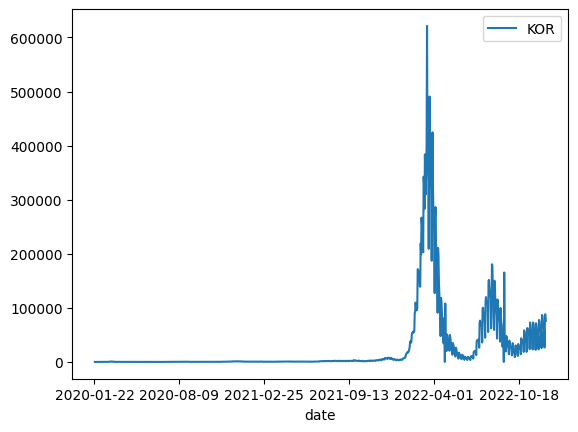

In [ ]:
#신규확진자수 확인
final_df.plot.line()

<Axes: xlabel='date'>

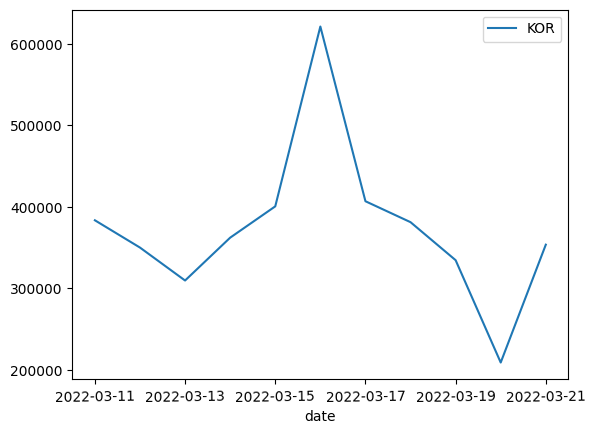

In [ ]:
final_df['2022-03-11':'2022-03-21'].plot.line(rot=1)

<Axes: xlabel='date'>

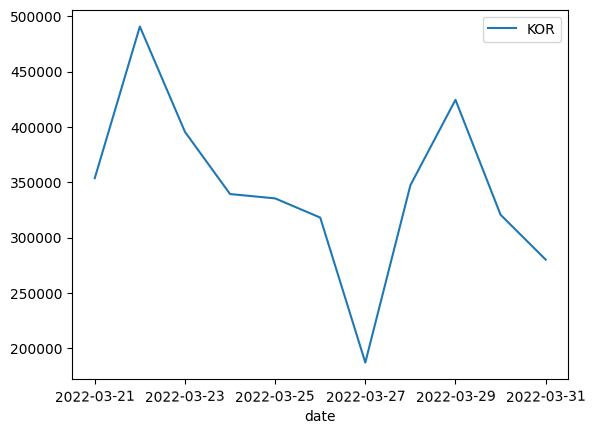

In [ ]:
final_df['2022-03-21':'2022-03-31'].plot.line(rot=1)

In [ ]:
kor_stringency_index= kor_date_index_df['stringency_index']
kor_stringency_index

date
2020-01-22     0.00
2020-01-23     0.00
2020-01-24     0.00
2020-01-25     0.00
2020-01-26     0.00
              ...  
2022-12-17    11.11
2022-12-18    11.11
2022-12-19    11.11
2022-12-20      NaN
2022-12-21      NaN
Name: stringency_index, Length: 1065, dtype: float64

In [ ]:
final_df = pd.DataFrame({
    'KOR' : kor_stringency_index,
    }, index=kor_date_index_df.index)

final_df.head()

,KOR
date,
2020-01-22,0.0
2020-01-23,0.0
2020-01-24,0.0
2020-01-25,0.0
2020-01-26,0.0


<Axes: xlabel='date'>

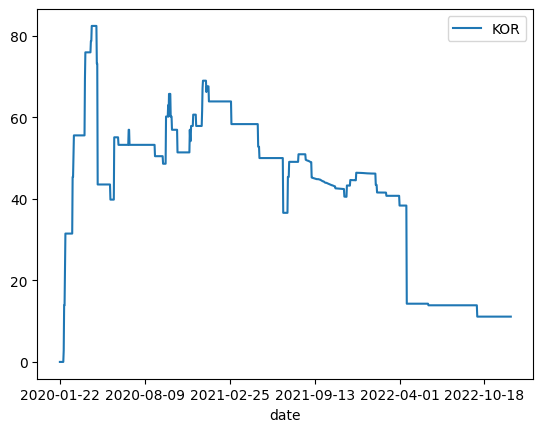

In [ ]:
final_df.plot.line()